In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#Train Test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import math

# ML
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('crypto_data.csv')
df.drop(df[['Year','Month','year_month', 'Volume']],axis=1,inplace=True)
df

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,Sentiment,Crisis,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,1.0,15.0,0.000000,177.351888,185.916300,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,2.0,14.0,0.000000,177.351888,185.916300,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,2.0,17.0,0.000000,177.351888,185.916300,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,2.0,16.0,0.000000,177.351888,185.916300,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,2.0,17.0,0.000000,177.351888,185.916300,35908.386719,36074.757812,34086.152344,35040.835938,35040.835938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65451,pancakeswap-token,2023-06-21,1.407302,2.895687e+08,2.380494e+07,0.009241,0.022358,1.0,1.0,79.0,...,2.0,21.0,0.021557,234.933829,233.199826,1.409517,1.442933,1.403805,1.432450,1.432450
65452,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964,0.024535,1.0,2.0,79.0,...,2.0,22.0,0.018056,234.933829,233.199826,1.432334,1.475298,1.404411,1.408657,1.408657
65453,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146,0.017733,1.0,1.0,77.0,...,2.0,21.0,0.020300,234.933829,233.199826,1.408780,1.449615,1.404394,1.434266,1.434266
65454,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708,0.025339,1.0,1.0,69.0,...,2.0,19.0,0.017733,234.933829,233.199826,1.434368,1.455681,1.393096,1.420914,1.420914


### Pre-Liminary Analysis

In [4]:
df.describe()

,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,Collapse,Sell,...,Sentiment,Crisis,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close
count,6.545600e+04,6.545600e+04,6.545600e+04,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,...,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000,65456.000000
mean,8.876698e+02,1.414720e+10,7.865825e+08,-0.000796,0.025398,0.732584,1.089113,52.469170,4.647519,35.678593,...,2.026949,19.817099,0.046247,258.083489,265.754372,885.959986,906.094707,866.003297,885.743345,885.743345
std,5.221712e+03,7.667274e+10,3.785546e+09,0.064989,0.010754,0.442615,0.431181,15.950216,6.076370,13.240713,...,0.992127,6.924977,0.042995,41.439162,43.775698,5213.305213,5355.755270,5093.018907,5212.004667,5212.004667
min,4.667009e-07,0.000000e+00,0.000000e+00,-6.770549,0.000000,0.000000,0.000000,24.000000,1.000000,18.000000,...,1.000000,8.000000,0.000000,177.351888,185.916300,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.365923e-01,5.597387e+08,1.455726e+07,-0.025079,0.018751,0.000000,1.000000,39.000000,2.000000,23.000000,...,1.000000,14.000000,0.024910,230.552471,233.199826,0.228359,0.237095,0.220149,0.228239,0.228239
50%,3.259290e+00,1.369458e+09,6.979788e+07,-0.000098,0.023967,1.000000,1.000000,52.000000,3.000000,32.000000,...,2.000000,19.000000,0.039587,254.960194,259.332455,2.360412,2.478302,2.255585,2.357240,2.357240
75%,3.212543e+01,4.203360e+09,2.867724e+08,0.022935,0.029891,1.000000,1.000000,62.000000,5.000000,51.000000,...,2.000000,24.000000,0.058457,298.664504,304.133902,28.392046,29.692396,27.211355,28.356503,28.356503
max,6.761702e+04,1.278798e+12,1.054263e+11,1.959941,0.152215,1.000000,3.000000,100.000000,83.000000,62.000000,...,12.000000,41.000000,2.671039,329.304359,341.803309,67549.734375,162188.250000,66458.726562,67566.828125,67566.828125


### Visualisation

In [5]:
sns.set_theme(style='darkgrid')

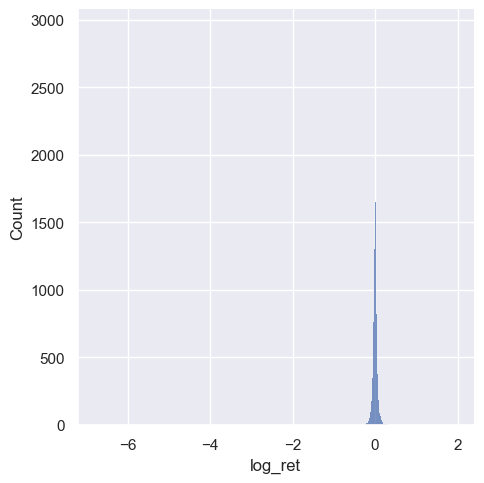

In [6]:
sns.displot(df['log_ret'], kde=False)
plt.show()

### Stationarity Check

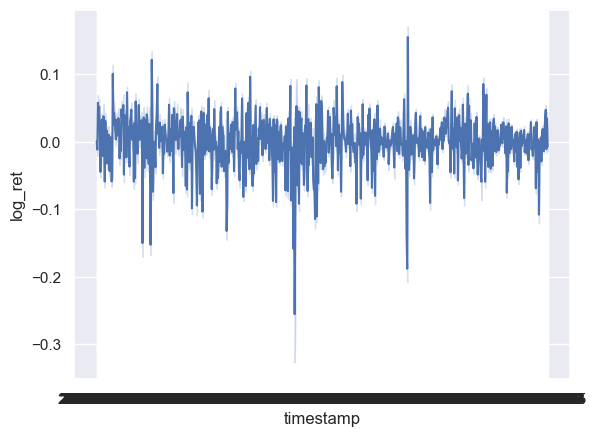

In [7]:
#df['log_ret'][df['id']=='bitcoin'].plot()
sns.lineplot(x=df['timestamp'],y=df['log_ret'])
plt.show()

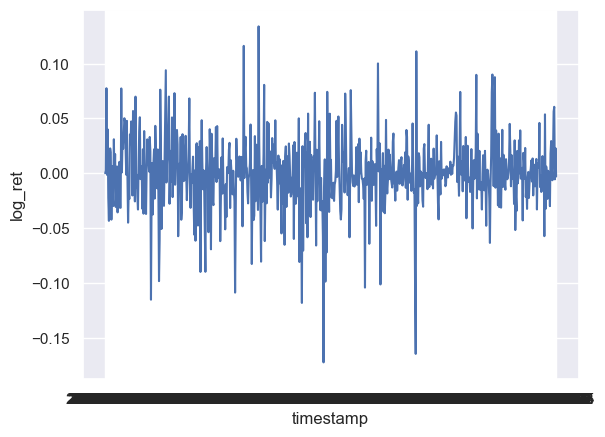

In [8]:
sns.lineplot(x=df['timestamp'][df['id']=='bitcoin'],y=df['log_ret'][df['id']=='bitcoin'])
plt.show()

### Correlation Analysis 

C:\Users\validol\AppData\Local\Temp\ipykernel_30864\570970446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


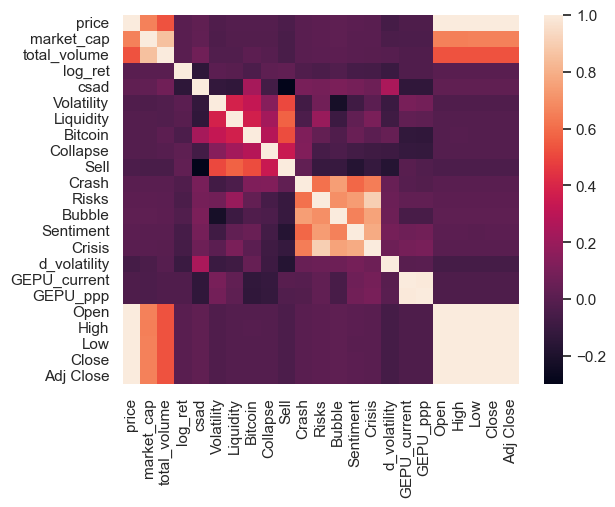

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

### Crash Calculation

In [10]:
df['id'].unique().tolist()

['bitcoin',
 'ethereum',
 'binancecoin',
 'ripple',
 'staked-ether',
 'cardano',
 'dogecoin',
 'solana',
 'tron',
 'litecoin',
 'polkadot',
 'matic-network',
 'wrapped-bitcoin',
 'avalanche-2',
 'shiba-inu',
 'uniswap',
 'bitcoin-cash',
 'leo-token',
 'chainlink',
 'monero',
 'cosmos',
 'okb',
 'ethereum-classic',
 'stellar',
 'internet-computer',
 'filecoin',
 'lido-dao',
 'hedera-hashgraph',
 'quant-network',
 'crypto-com-chain',
 'near',
 'vechain',
 'aave',
 'the-graph',
 'blockstack',
 'frax',
 'algorand',
 'elrond-erd-2',
 'fantom',
 'the-sandbox',
 'eos',
 'theta-token',
 'tezos',
 'rocket-pool',
 'render-token',
 'havven',
 'decentraland',
 'bitcoin-cash-sv',
 'axie-infinity',
 'kucoin-shares',
 'gala',
 'kava',
 'neo',
 'maker',
 'curve-dao-token',
 'gatechain-token',
 'flow',
 'injective-protocol',
 'klay-token',
 'terra-luna',
 'iota',
 'pax-gold',
 'conflux-token',
 'tether-gold',
 'tokenize-xchange',
 'casper-network',
 'mina-protocol',
 'xdce-crowd-sale',
 'huobi-token',


##### Calculate for each cryptocurrency its threshold based on the percentile

In [11]:
for i in df['id'].unique().tolist():
    df.loc[df['id'] == i, 'l_bound'] = df['log_ret'][df['id'] == i].quantile(q=0.05)
    df.loc[df['id'] == i, 'u_bound'] = df['log_ret'][df['id'] == i].quantile(q=0.95)

In [12]:
df

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close,l_bound,u_bound
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,0.000000,177.351888,185.916300,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,-0.051003,0.048549
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,0.000000,177.351888,185.916300,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,-0.051003,0.048549
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,0.000000,177.351888,185.916300,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,-0.051003,0.048549
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,0.000000,177.351888,185.916300,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,-0.051003,0.048549
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,0.000000,177.351888,185.916300,35908.386719,36074.757812,34086.152344,35040.835938,35040.835938,-0.051003,0.048549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65451,pancakeswap-token,2023-06-21,1.407302,2.895687e+08,2.380494e+07,0.009241,0.022358,1.0,1.0,79.0,...,0.021557,234.933829,233.199826,1.409517,1.442933,1.403805,1.432450,1.432450,-0.073054,0.059879
65452,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964,0.024535,1.0,2.0,79.0,...,0.018056,234.933829,233.199826,1.432334,1.475298,1.404411,1.408657,1.408657,-0.073054,0.059879
65453,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146,0.017733,1.0,1.0,77.0,...,0.020300,234.933829,233.199826,1.408780,1.449615,1.404394,1.434266,1.434266,-0.073054,0.059879
65454,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708,0.025339,1.0,1.0,69.0,...,0.017733,234.933829,233.199826,1.434368,1.455681,1.393096,1.420914,1.420914,-0.073054,0.059879


### Calculating the Weighted Average

In [13]:
l_weighted_average = np.mean([np.average(df.l_bound,weights=df.market_cap),np.average(df.l_bound,weights=df.total_volume)])
u_weighted_average = np.mean([np.average(df.u_bound,weights=df.market_cap),np.average(df.u_bound,weights=df.total_volume)])

In [14]:
l_weighted_average

-0.06427315935502755

### Classifying

In [15]:
df['movement'] = 0  # initialize column with 'stable'
df.loc[df['log_ret'] < l_weighted_average, 'movement'] = -1  # assign 'crash'
df.loc[df['log_ret'] > u_weighted_average, 'movement'] = 1   # assign 'surge'

In [16]:
df.drop(['l_bound','u_bound'],axis=1,inplace=True)
df

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,Crisis,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close,movement
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,15.0,0.000000,177.351888,185.916300,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,0
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,14.0,0.000000,177.351888,185.916300,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,0
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,17.0,0.000000,177.351888,185.916300,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,1
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,16.0,0.000000,177.351888,185.916300,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,0
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,17.0,0.000000,177.351888,185.916300,35908.386719,36074.757812,34086.152344,35040.835938,35040.835938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65451,pancakeswap-token,2023-06-21,1.407302,2.895687e+08,2.380494e+07,0.009241,0.022358,1.0,1.0,79.0,...,21.0,0.021557,234.933829,233.199826,1.409517,1.442933,1.403805,1.432450,1.432450,0
65452,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964,0.024535,1.0,2.0,79.0,...,22.0,0.018056,234.933829,233.199826,1.432334,1.475298,1.404411,1.408657,1.408657,0
65453,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146,0.017733,1.0,1.0,77.0,...,21.0,0.020300,234.933829,233.199826,1.408780,1.449615,1.404394,1.434266,1.434266,0
65454,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708,0.025339,1.0,1.0,69.0,...,19.0,0.017733,234.933829,233.199826,1.434368,1.455681,1.393096,1.420914,1.420914,0


C:\Users\validol\AppData\Local\Temp\ipykernel_30864\570970446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


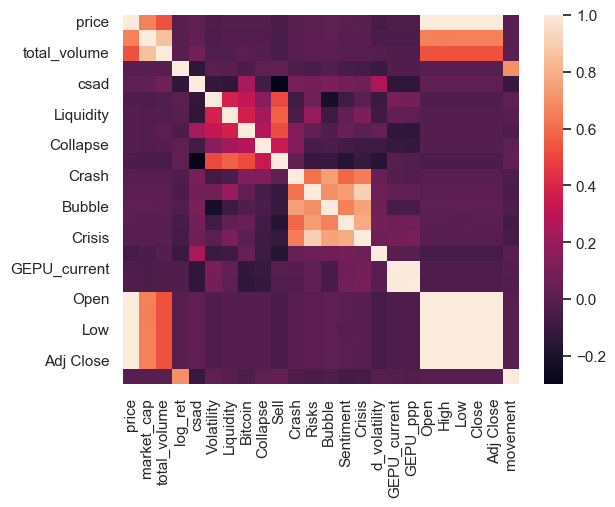

In [17]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

### Checking for the valid crypto to be brought into the analysis

In [18]:
valid_crypto = df.id.value_counts()
print(valid_crypto[valid_crypto == 730])

bitcoin               730
ethereum              730
injective-protocol    730
flow                  730
gatechain-token       730
                     ... 
filecoin              730
internet-computer     730
stellar               730
ethereum-classic      730
blockstack            730
Name: id, Length: 76, dtype: int64


In [19]:
vc = dict(valid_crypto[valid_crypto == 730])
print(vc)

{'bitcoin': 730, 'ethereum': 730, 'injective-protocol': 730, 'flow': 730, 'gatechain-token': 730, 'curve-dao-token': 730, 'maker': 730, 'neo': 730, 'kava': 730, 'axie-infinity': 730, 'terra-luna': 730, 'bitcoin-cash-sv': 730, 'decentraland': 730, 'havven': 730, 'render-token': 730, 'rocket-pool': 730, 'tezos': 730, 'theta-token': 730, 'klay-token': 730, 'iota': 730, 'the-sandbox': 730, 'dash': 730, 'pancakeswap-token': 730, 'zilliqa': 730, 'compound-usd-coin': 730, 'nexo': 730, 'arweave': 730, 'woo-network': 730, 'trust-wallet-token': 730, 'chiliz': 730, 'pax-gold': 730, 'huobi-token': 730, 'xdce-crowd-sale': 730, 'mina-protocol': 730, 'casper-network': 730, 'tokenize-xchange': 730, 'tether-gold': 730, 'conflux-token': 730, 'eos': 730, 'kucoin-shares': 730, 'fantom': 730, 'elrond-erd-2': 730, 'leo-token': 730, 'bitcoin-cash': 730, 'uniswap': 730, 'shiba-inu': 730, 'avalanche-2': 730, 'wrapped-bitcoin': 730, 'matic-network': 730, 'litecoin': 730, 'monero': 730, 'tron': 730, 'solana': 73

##### Taking the rows that include these key values

In [20]:
type(str(list(vc.keys())))

str

In [21]:
df2 = df[df['id'] == vc]

In [22]:
df2

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,Crisis,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close,movement


In [23]:
for x in vc:
    tmp_df = df[df['id'] == str(x)]
    df2 = df2.append(tmp_df)

C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: 

C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df)
C:\Users\validol\AppData\Local\Temp\ipykernel_30864\1921467185.py:3: FutureWarning: 

In [24]:
df2

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,Crisis,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close,movement
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,15.0,0.000000,177.351888,185.916300,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,0
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,14.0,0.000000,177.351888,185.916300,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,0
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,17.0,0.000000,177.351888,185.916300,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,1
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,16.0,0.000000,177.351888,185.916300,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,0
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,17.0,0.000000,177.351888,185.916300,35908.386719,36074.757812,34086.152344,35040.835938,35040.835938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64026,blockstack,2023-06-21,0.749546,1.037037e+09,8.798633e+07,0.228371,0.022358,1.0,1.0,79.0,...,21.0,0.093417,234.933829,233.199826,0.004072,0.005236,0.003978,0.004274,0.004274,1
64027,blockstack,2023-06-22,0.820362,1.139010e+09,1.206228e+08,0.090279,0.024535,1.0,2.0,79.0,...,22.0,0.081013,234.933829,233.199826,0.004288,0.004354,0.004066,0.004258,0.004258,1
64028,blockstack,2023-06-23,0.772220,1.077784e+09,9.529350e+07,-0.060476,0.017733,1.0,1.0,77.0,...,21.0,0.093791,234.933829,233.199826,0.004257,0.004279,0.004090,0.004141,0.004141,0
64029,blockstack,2023-06-24,0.763717,1.056804e+09,9.771481e+07,-0.011073,0.025339,1.0,1.0,69.0,...,19.0,0.096209,234.933829,233.199826,0.004142,0.004295,0.004086,0.004148,0.004148,0


### SMA

In [25]:
df2[['Adj Close','timestamp']][df2['id'] == 'bitcoin']

,Adj Close,timestamp
0,32186.277344,2021-06-26
1,34649.644531,2021-06-27
2,34434.335938,2021-06-28
3,35867.777344,2021-06-29
4,35040.835938,2021-06-30
...,...,...
63126,30027.296875,2023-06-21
63127,29912.281250,2023-06-22
63128,30695.468750,2023-06-23
63129,30548.695312,2023-06-24


In [26]:
# for x in vc:

#     df2_ma_btc = df2[['Adj Close','timestamp']][df2['id'] == str(x)]
#     df2_ma_btc['timestamp'] = pd.to_datetime(df2_ma_btc['timestamp'])
#     df2_ma_btc = df2_ma_btc.set_index('timestamp')
#     plt.figure(figsize=(16,8))
#     plt.plot(df2_ma_btc)

#     plt.title(f'Adjusted Close Historic Price for {str(x)}', fontsize=18)
#     plt.ylabel('Price')
#     plt.xlabel('Date')

#     plt.savefig(f'{str(x)}_ma.png')

#### Calculating SMAs

In [27]:
crypto_list = df2['id'].unique()
for crypto in crypto_list:
    df2.loc[df2['id'] == crypto, 'SMA07'] = df2.loc[df2['id'] == crypto,'Adj Close'].rolling(window=7).mean()
    # print(f'Rolling Mean for {crypto}: is = ', df2.loc[df2['id'] == crypto,'Adj Close'].rolling(window=7).mean())
for crypto in crypto_list:
    df2.loc[df2['id'] == crypto, 'SMA30'] = df2.loc[df2['id'] == crypto,'Adj Close'].rolling(window=30).mean()

In [28]:
from statsmodels.tsa.stattools import adfuller

for crypto in df2['id'].unique():
    result = adfuller(df2.loc[df2['id'] == crypto, 'Adj Close'])
    print(f'ADF Statistic for {crypto}: {result[0]}')
    print(f'p-value for {crypto}: {result[1]}\n')


ADF Statistic for bitcoin: -1.3068516581394842
p-value for bitcoin: 0.6260318709751456

ADF Statistic for ethereum: -1.3298512425074256
p-value for ethereum: 0.6154071204325341

ADF Statistic for injective-protocol: -1.4007867098358253
p-value for injective-protocol: 0.5818989018773972

ADF Statistic for flow: -1.6360385232989407
p-value for flow: 0.4643315203825561

ADF Statistic for gatechain-token: -1.9813850763103402
p-value for gatechain-token: 0.29479426171307227

ADF Statistic for curve-dao-token: -1.425639607974934
p-value for curve-dao-token: 0.5699243306684374

ADF Statistic for maker: -1.0875067688824314
p-value for maker: 0.7200282599540181

ADF Statistic for neo: -1.3014904702020427
p-value for neo: 0.6284901461667223

ADF Statistic for kava: -0.9703207248953573
p-value for kava: 0.7639346672929597

ADF Statistic for axie-infinity: -1.1615264059232395
p-value for axie-infinity: 0.6899233692524336

ADF Statistic for terra-luna: -1.7014342765875456
p-value for terra-luna: 0.

In [29]:
df2['SMA07'].isna().sum()

456

#### Stationarity

In [30]:
rolling_mean = df2['Adj Close'].rolling(window=7).mean()

In [31]:
df2['Signal'] = np.where(df2['SMA07'] > df2['SMA30'],1,0)
df2['Position'] = df2['Signal'].diff()
df2['Buy'] = np.where(df2['Position'] == 1, df2['Adj Close'],np.NAN)
df2['Sell'] = np.where(df2['Position'] == -1, df2['Adj Close'], np.NAN)

In [32]:
df2

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,High,Low,Close,Adj Close,movement,SMA07,SMA30,Signal,Position,Buy
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,32637.587891,30184.501953,32186.277344,32186.277344,0,NaN,NaN,0,NaN,NaN
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,34656.128906,32071.757812,34649.644531,34649.644531,0,NaN,NaN,0,0.0,NaN
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,35219.890625,33902.074219,34434.335938,34434.335938,1,NaN,NaN,0,0.0,NaN
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,36542.109375,34252.484375,35867.777344,35867.777344,0,NaN,NaN,0,0.0,NaN
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,36074.757812,34086.152344,35040.835938,35040.835938,0,NaN,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64026,blockstack,2023-06-21,0.749546,1.037037e+09,8.798633e+07,0.228371,0.022358,1.0,1.0,79.0,...,0.005236,0.003978,0.004274,0.004274,1,0.004181,0.004331,0,0.0,NaN
64027,blockstack,2023-06-22,0.820362,1.139010e+09,1.206228e+08,0.090279,0.024535,1.0,2.0,79.0,...,0.004354,0.004066,0.004258,0.004258,1,0.004183,0.004334,0,0.0,NaN
64028,blockstack,2023-06-23,0.772220,1.077784e+09,9.529350e+07,-0.060476,0.017733,1.0,1.0,77.0,...,0.004279,0.004090,0.004141,0.004141,0,0.004171,0.004363,0,0.0,NaN
64029,blockstack,2023-06-24,0.763717,1.056804e+09,9.771481e+07,-0.011073,0.025339,1.0,1.0,69.0,...,0.004295,0.004086,0.004148,0.004148,0,0.004164,0.004342,0,0.0,NaN


In [33]:
# for x in vc:
#     df2_sma_btc = df2.copy()
#     df2_sma_btc = df2_sma_btc.set_index('timestamp')
#     # Visualize the close price with SMA also Buy and Sell Signals
#     plt.figure(figsize=(16,8))
#     plt.plot(df2_sma_btc['Adj Close'][df2_sma_btc['id'] == str(x)], alpha=0.5, label='Actual Close Price')
#     plt.plot(df2_sma_btc['SMA07'][df2_sma_btc['id'] == str(x)], alpha=0.5, label='SMA07')
#     plt.plot(df2_sma_btc['SMA30'][df2_sma_btc['id'] == str(x)], alpha=0.5, label='SMA30')

#     # Make buy or sell signal
#     plt.scatter(df2_sma_btc.index[df2_sma_btc['id'] == str(x)], df2_sma_btc['Buy'][df2_sma_btc['id'] == str(x)], alpha=1, label='Buy Signal', marker='^', color='green')
#     plt.scatter(df2_sma_btc.index[df2_sma_btc['id'] == str(x)], df2_sma_btc['Sell'][df2_sma_btc['id'] == str(x)], alpha=1, label='Sell Signal', marker='v', color='red')

#     # Adding text into the visualization
#     plt.title('Adj Close Price w/ Buy and Sell Signals', fontsize=18)
#     plt.ylabel('Adj Close Price', fontsize=18)
#     plt.xlabel('Date', fontsize=18)

#     # Give legend
#     plt.legend()

#     # Show the graph
#     plt.savefig(f'{str(x)}_sma_signals.png')

### Data Standardisation

In [34]:
df2.drop(['SMA07','SMA30','Signal','Position','Buy'],axis=1,inplace=True)
df2.head()

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,Crisis,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close,movement
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,15.0,0.0,177.351888,185.9163,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,0
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,14.0,0.0,177.351888,185.9163,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,0
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,17.0,0.0,177.351888,185.9163,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,1
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,16.0,0.0,177.351888,185.9163,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,0
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,17.0,0.0,177.351888,185.9163,35908.386719,36074.757812,34086.152344,35040.835938,35040.835938,0


In [35]:
print(df2.head())

        id   timestamp         price    market_cap  total_volume   log_ret  \
0  bitcoin  2021-06-26  31943.136468  5.987030e+11  3.863525e+10  0.000000   
1  bitcoin  2021-06-27  32023.973902  6.002353e+11  3.687311e+10  0.002527   
2  bitcoin  2021-06-28  34607.293274  6.492621e+11  3.433545e+10  0.077580   
3  bitcoin  2021-06-29  34556.842127  6.477412e+11  3.245380e+10 -0.001459   
4  bitcoin  2021-06-30  35968.993668  6.742313e+11  3.512126e+10  0.040052   

       csad  Volatility  Liquidity  Bitcoin  ...  Crisis  d_volatility  \
0  0.000000         0.0        0.0     73.0  ...    15.0           0.0   
1  0.026520         0.0        1.0     68.0  ...    14.0           0.0   
2  0.027467         1.0        1.0     70.0  ...    17.0           0.0   
3  0.033799         1.0        1.0     73.0  ...    16.0           0.0   
4  0.031317         1.0        1.0     64.0  ...    17.0           0.0   

   GEPU_current  GEPU_ppp          Open          High           Low  \
0    177.351888

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(df2.drop(columns=['movement','timestamp','id']))
# create df fit scaled data
scaled_df = pd.DataFrame(data=scaled,columns=df2.drop(columns=['movement','id','timestamp']).columns)

In [37]:
scaled_df

,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,Collapse,Sell,...,Sentiment,Crisis,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close
0,0.472413,0.468176,0.366467,0.833512,0.000000,0.0,0.000000,0.644737,1.000000,NaN,...,0.000000,0.212121,0.000000,0.000000,0.000000,4.677245e-01,2.012328e-01,4.541842e-01,4.763621e-01,4.763621e-01
1,0.473608,0.469375,0.349752,0.833823,0.174231,0.0,0.333333,0.578947,0.743902,NaN,...,0.090909,0.181818,0.000000,0.000000,0.000000,4.779815e-01,2.136784e-01,4.825816e-01,5.128204e-01,5.128204e-01
2,0.511813,0.507713,0.325682,0.843062,0.180448,1.0,0.333333,0.605263,0.548780,NaN,...,0.090909,0.272727,0.000000,0.000000,0.000000,5.133865e-01,2.171544e-01,5.101222e-01,5.096337e-01,5.096337e-01
3,0.511067,0.506524,0.307834,0.833332,0.222046,1.0,0.333333,0.644737,0.426829,NaN,...,0.090909,0.242424,0.000000,0.000000,0.000000,5.103730e-01,2.253068e-01,5.153948e-01,5.308489e-01,5.308489e-01
4,0.531952,0.527238,0.333136,0.838442,0.205740,1.0,0.333333,0.526316,0.365854,NaN,...,0.090909,0.272727,0.000000,0.000000,0.000000,5.315844e-01,2.224252e-01,5.128920e-01,5.186100e-01,5.186100e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55475,0.000011,0.000811,0.000835,0.861626,0.146884,1.0,0.333333,0.723684,0.060976,NaN,...,0.090909,0.393939,0.034974,0.378947,0.303319,6.019268e-08,3.224648e-08,5.978146e-08,6.316709e-08,6.316709e-08
55476,0.000012,0.000891,0.001144,0.844626,0.161184,1.0,0.666667,0.723684,0.060976,NaN,...,0.090909,0.424242,0.030330,0.378947,0.303319,6.339033e-08,2.680835e-08,6.110560e-08,6.293029e-08,6.293029e-08
55477,0.000011,0.000843,0.000904,0.826067,0.116501,1.0,0.333333,0.697368,0.060976,NaN,...,0.090909,0.393939,0.035114,0.378947,0.303319,6.293141e-08,2.634593e-08,6.146672e-08,6.119867e-08,6.119867e-08
55478,0.000011,0.000826,0.000927,0.832149,0.166468,1.0,0.333333,0.592105,0.060976,NaN,...,0.090909,0.333333,0.036019,0.378947,0.303319,6.122896e-08,2.644458e-08,6.140653e-08,6.130227e-08,6.130227e-08


In [38]:
df3 = df2.copy()
df3[scaled_df.columns] = np.array(scaled_df)
df3['crypto_coin'] = list(df3.id)

In [39]:
df3

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,d_volatility,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close,movement,crypto_coin
0,bitcoin,2021-06-26,0.472413,0.468176,0.366467,0.833512,0.000000,0.0,0.000000,0.644737,...,0.000000,0.000000,0.000000,4.677245e-01,2.012328e-01,4.541842e-01,4.763621e-01,4.763621e-01,0,bitcoin
1,bitcoin,2021-06-27,0.473608,0.469375,0.349752,0.833823,0.174231,0.0,0.333333,0.578947,...,0.000000,0.000000,0.000000,4.779815e-01,2.136784e-01,4.825816e-01,5.128204e-01,5.128204e-01,0,bitcoin
2,bitcoin,2021-06-28,0.511813,0.507713,0.325682,0.843062,0.180448,1.0,0.333333,0.605263,...,0.000000,0.000000,0.000000,5.133865e-01,2.171544e-01,5.101222e-01,5.096337e-01,5.096337e-01,1,bitcoin
3,bitcoin,2021-06-29,0.511067,0.506524,0.307834,0.833332,0.222046,1.0,0.333333,0.644737,...,0.000000,0.000000,0.000000,5.103730e-01,2.253068e-01,5.153948e-01,5.308489e-01,5.308489e-01,0,bitcoin
4,bitcoin,2021-06-30,0.531952,0.527238,0.333136,0.838442,0.205740,1.0,0.333333,0.526316,...,0.000000,0.000000,0.000000,5.315844e-01,2.224252e-01,5.128920e-01,5.186100e-01,5.186100e-01,0,bitcoin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64026,blockstack,2023-06-21,0.000011,0.000811,0.000835,0.861626,0.146884,1.0,0.333333,0.723684,...,0.034974,0.378947,0.303319,6.019268e-08,3.224648e-08,5.978146e-08,6.316709e-08,6.316709e-08,1,blockstack
64027,blockstack,2023-06-22,0.000012,0.000891,0.001144,0.844626,0.161184,1.0,0.666667,0.723684,...,0.030330,0.378947,0.303319,6.339033e-08,2.680835e-08,6.110560e-08,6.293029e-08,6.293029e-08,1,blockstack
64028,blockstack,2023-06-23,0.000011,0.000843,0.000904,0.826067,0.116501,1.0,0.333333,0.697368,...,0.035114,0.378947,0.303319,6.293141e-08,2.634593e-08,6.146672e-08,6.119867e-08,6.119867e-08,0,blockstack
64029,blockstack,2023-06-24,0.000011,0.000826,0.000927,0.832149,0.166468,1.0,0.333333,0.592105,...,0.036019,0.378947,0.303319,6.122896e-08,2.644458e-08,6.140653e-08,6.130227e-08,6.130227e-08,0,blockstack


In [40]:
df3 = df3.set_index(['id','timestamp'])
print(df3.head())

                       price  market_cap  total_volume   log_ret      csad  \
id      timestamp                                                            
bitcoin 2021-06-26  0.472413    0.468176      0.366467  0.833512  0.000000   
        2021-06-27  0.473608    0.469375      0.349752  0.833823  0.174231   
        2021-06-28  0.511813    0.507713      0.325682  0.843062  0.180448   
        2021-06-29  0.511067    0.506524      0.307834  0.833332  0.222046   
        2021-06-30  0.531952    0.527238      0.333136  0.838442  0.205740   

                    Volatility  Liquidity   Bitcoin  Collapse  Sell  ...  \
id      timestamp                                                    ...   
bitcoin 2021-06-26         0.0   0.000000  0.644737  1.000000   NaN  ...   
        2021-06-27         0.0   0.333333  0.578947  0.743902   NaN  ...   
        2021-06-28         1.0   0.333333  0.605263  0.548780   NaN  ...   
        2021-06-29         1.0   0.333333  0.644737  0.426829   NaN  ... 

In [41]:
df3.to_csv('scaled_n_comp_crypto.csv')